# Agrupamento com Algoritmo K-Means

## Importações

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.decomposition import PCA

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [68]:
from sklearn.cluster import DBSCAN

In [4]:
base_cartao = pd.read_csv('../data/credit_card_clients.csv', header=1)

## Base Idade e Salário

### Dataset

In [5]:
x=[20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48]  
y=[1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]  

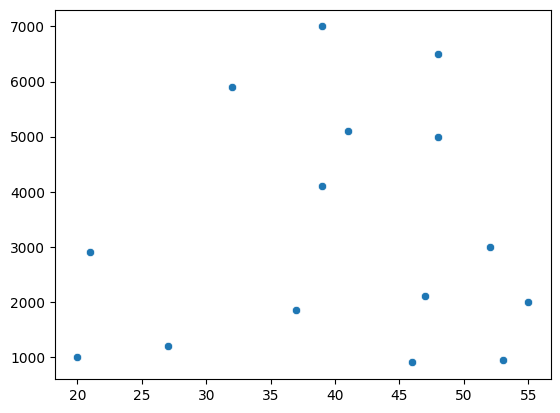

In [6]:
grafico = sns.scatterplot(x=x, y=y)

In [7]:
### Criação da base de salário (matriz)
base_salario = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                        [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                        [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

In [8]:
base_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

### Padronização dos dados

In [9]:
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)

In [10]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

### K-Means

In [11]:
# Criação e Treinamento (dados randomicos, cluster, calculos)
kmeans_salario = KMeans(n_clusters=3)
kmeans_salario.fit(base_salario)

c:\Users\Emanuelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Emanuelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=3)

In [12]:
centroides = kmeans_salario.cluster_centers_
centroides

array([[ 0.07703438,  1.11413572],
       [ 0.73953003, -0.72661025],
       [-1.63312883, -0.77505093]])

In [13]:
# Para observar com os dados reais é só fazer o processo inverso
scaler_salario.inverse_transform(kmeans_salario.cluster_centers_)

array([[  41.16666667, 5600.        ],
       [  48.33333333, 1800.        ],
       [  22.66666667, 1700.        ]])

In [14]:
rotulos = kmeans_salario.labels_
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

- Grupo 0 -> Pessoas com 41 anos e salário de 5.600,00
- Grupo 1 -> Pessoas com 48 anos e salário de 1.800,00
- Grupo 2 -> Pessoas com 22 anos e salário de 1.700,00

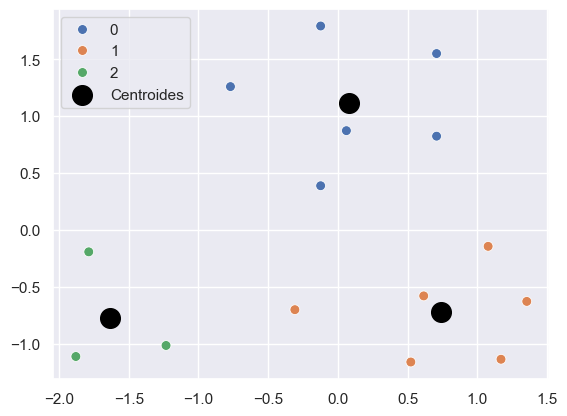

In [15]:
sns.set_theme(style='darkgrid')
sns.scatterplot(x=base_salario[:, 0], y=base_salario[:, 1], hue=rotulos, palette="deep", s=50)
plt.scatter(centroides[:, 0], centroides[:, 1], color="black", s=200, label="Centroides")
plt.legend()
plt.show()

## Dados Randomicos

### Importação e Geração de Dados Aleatórios

make_blobs gera dados aleatórios.

In [16]:
from sklearn.datasets import make_blobs

In [17]:
X_random, y_random = make_blobs(n_samples=200, centers=5, random_state=1)

In [18]:
X_random

array([[-1.96576392e+00,  5.23446451e+00],
       [-5.16022348e+00, -7.04217141e+00],
       [-6.17937069e+00, -2.16733539e+00],
       [-7.39138168e+00, -9.49590389e+00],
       [-6.38481234e+00, -8.47302970e+00],
       [-6.26144310e+00, -3.78347905e+00],
       [-2.04278768e+00,  3.07660864e-01],
       [-4.46426086e+00, -4.39451238e+00],
       [-6.40386190e+00, -6.36106990e+00],
       [ 2.42271161e-04,  5.14853403e+00],
       [-5.99212006e+00, -3.91488289e+00],
       [-6.46137477e+00, -3.14560994e+00],
       [-4.10185174e+00, -1.16625450e+00],
       [-1.01341572e+01, -4.07240274e+00],
       [-5.99004766e+00, -2.82631801e+00],
       [-1.14663009e+00,  4.10839703e+00],
       [-1.17104176e+00,  4.33091816e+00],
       [-9.19585147e+00, -3.90678125e+00],
       [-8.30173556e+00, -7.27738918e+00],
       [-7.56309575e+00, -8.46421308e+00],
       [-1.86845414e+00,  4.99311306e+00],
       [-4.22362233e+00, -2.50312346e+00],
       [-1.90838667e+00,  5.86113655e-01],
       [-6.

In [19]:
y_random

array([0, 2, 3, 2, 2, 3, 4, 3, 2, 0, 3, 3, 4, 1, 3, 0, 0, 1, 2, 2, 0, 3,
       4, 3, 4, 1, 2, 4, 4, 1, 2, 4, 0, 3, 2, 0, 1, 2, 1, 4, 2, 1, 4, 4,
       2, 4, 1, 3, 2, 0, 0, 3, 3, 0, 3, 1, 0, 4, 2, 2, 1, 3, 3, 3, 2, 0,
       0, 1, 4, 2, 1, 4, 2, 4, 4, 1, 2, 3, 0, 4, 1, 1, 3, 2, 3, 0, 2, 2,
       2, 1, 4, 3, 0, 4, 3, 1, 4, 0, 2, 1, 0, 2, 4, 1, 4, 2, 1, 2, 3, 0,
       3, 3, 2, 1, 3, 0, 1, 4, 0, 0, 2, 1, 1, 3, 0, 1, 2, 4, 2, 4, 0, 4,
       3, 3, 1, 1, 3, 0, 0, 3, 3, 3, 0, 0, 4, 2, 4, 0, 2, 3, 4, 3, 0, 4,
       3, 1, 1, 1, 0, 2, 4, 0, 1, 0, 4, 1, 1, 1, 3, 4, 1, 4, 4, 3, 0, 2,
       4, 3, 2, 0, 2, 0, 0, 2, 1, 4, 1, 0, 0, 3, 2, 4, 0, 1, 1, 4, 3, 4,
       2, 1])

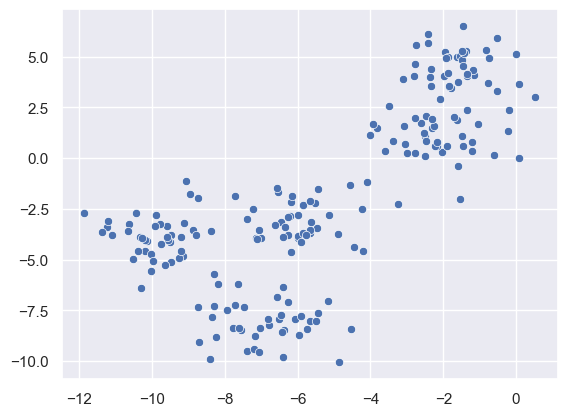

In [20]:
grafico = sns.scatterplot(x=X_random[:,0], y=X_random[:,1])

### K-Means

In [21]:
# Criação e Treinamento
kmeans_blobs = KMeans(n_clusters=5)
kmeans_blobs.fit(X_random)

KMeans(n_clusters=5)

In [22]:
# Outra forma de encontrar os rótulos
rotulos = kmeans_blobs.predict(X_random)
rotulos

array([0, 1, 2, 1, 1, 2, 3, 2, 1, 0, 2, 2, 2, 4, 2, 0, 0, 4, 1, 1, 0, 2,
       3, 2, 3, 4, 1, 3, 3, 4, 1, 3, 0, 2, 1, 0, 4, 1, 4, 0, 4, 4, 3, 3,
       1, 3, 4, 2, 1, 3, 0, 2, 2, 0, 2, 4, 0, 2, 1, 1, 4, 2, 2, 2, 1, 3,
       0, 4, 3, 1, 4, 3, 1, 3, 3, 4, 1, 4, 0, 3, 4, 4, 2, 1, 2, 0, 1, 1,
       1, 4, 3, 2, 0, 3, 2, 4, 3, 0, 1, 4, 0, 1, 3, 4, 3, 1, 4, 1, 2, 0,
       2, 2, 1, 4, 2, 0, 4, 3, 0, 0, 1, 4, 4, 2, 0, 4, 1, 3, 1, 3, 0, 3,
       2, 2, 4, 4, 2, 0, 0, 2, 2, 2, 0, 0, 3, 1, 3, 0, 1, 2, 3, 2, 0, 3,
       2, 4, 4, 4, 0, 1, 3, 0, 4, 0, 3, 4, 4, 4, 2, 3, 4, 3, 3, 2, 0, 1,
       3, 2, 1, 0, 1, 0, 0, 1, 4, 3, 4, 0, 0, 2, 1, 3, 0, 4, 4, 3, 2, 3,
       1, 4], dtype=int32)

In [23]:
centroides = kmeans_blobs.cluster_centers_
centroides

array([[-1.58338528,  4.50520457],
       [-6.87958999, -8.11648104],
       [-5.90368078, -3.04489641],
       [-2.17069756,  1.02591979],
       [-9.85620522, -3.91021738]])

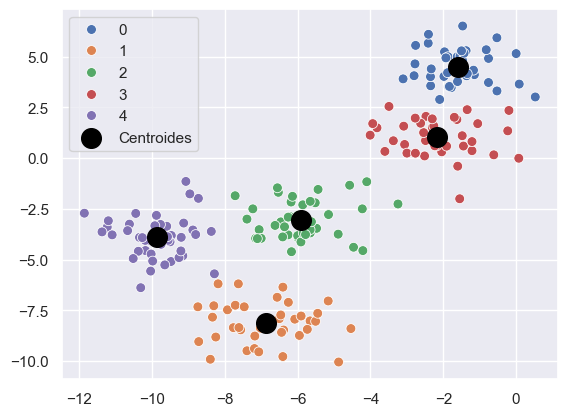

In [24]:
sns.set_theme(style='darkgrid')
sns.scatterplot(x=X_random[:, 0], y=X_random[:, 1], hue=rotulos, palette="deep", s=50)
plt.scatter(centroides[:, 0], centroides[:, 1], color="black", s=200, label="Centroides")
plt.legend()
plt.show()

## Base de Dados - Cartão de Crédito

In [25]:
base_cartao

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [26]:
# Somando o total a ser pago
base_cartao['BILL_TOTAL'] = base_cartao['BILL_AMT1'] + base_cartao['BILL_AMT2'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT4'] + base_cartao['BILL_AMT5'] + base_cartao['BILL_AMT6']

In [27]:
base_cartao

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,725349
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,21182
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,70496
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,266611


Separando na variável X:
- LIMITE
- GASTO TOTAL

In [28]:
X_cartao = base_cartao.iloc[:, [1, 25]].values
X_cartao

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]])

 - Normalizando os dados:

In [29]:
scaler_cartao = StandardScaler()
X_cartao = scaler_cartao.fit_transform(X_cartao)

In [30]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

Aplicando a técnica WCSS para definir o número de clusters:

In [31]:
wcss = []
for i in range(1, 11):
  kmeans_cartao = KMeans(n_clusters=i, random_state=0)
  kmeans_cartao.fit(X_cartao)
  wcss.append(kmeans_cartao.inertia_)

In [32]:
wcss

[60000.0,
 35197.834391257325,
 20128.202635623333,
 15892.249716910752,
 10708.603774943515,
 8604.40454486454,
 7684.9048461368475,
 6593.001391781406,
 5669.72158600274,
 5055.083531903288]

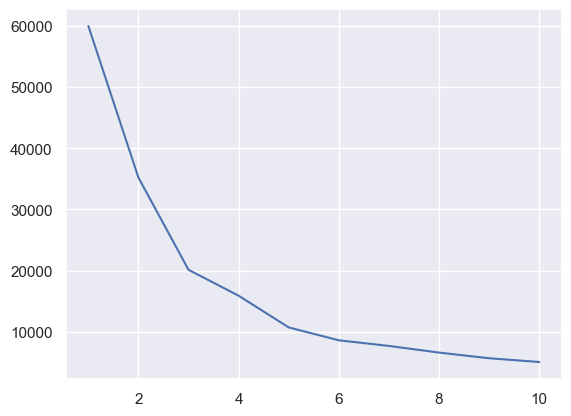

In [33]:
grafico = sns.lineplot(x=range(1,11), y=wcss)

In [34]:
kmeans_cartao = KMeans(n_clusters=5, random_state=0)
rotulos = kmeans_cartao.fit_predict(X_cartao)

Text(0, 0.5, 'Gastos')

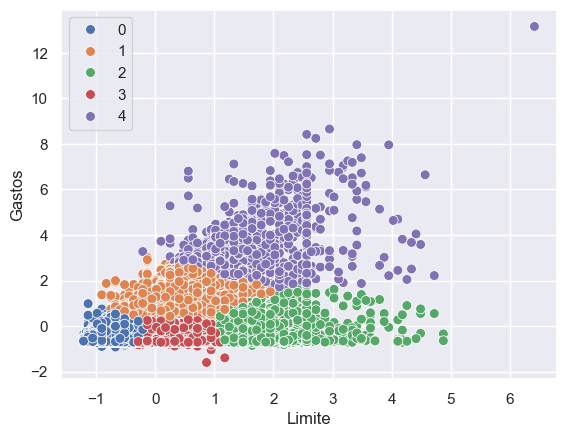

In [35]:
sns.set_theme(style='darkgrid')
grafico1 = sns.scatterplot(x=X_cartao[:, 0], y=X_cartao[:, 1], hue=rotulos, palette="deep", s=50)
grafico1.set_xlabel('Limite')
grafico1.set_ylabel('Gastos')

In [36]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [     2, 120000,      2, ...,      1,  17077,      0],
       [     3,  90000,      2, ...,      0, 101653,      0],
       ...,
       [ 29998,  30000,      1, ...,      1,  70496,      0],
       [ 29999,  80000,      1, ...,      1, 266611,      0],
       [ 30000,  50000,      1, ...,      1, 230874,      0]])

In [37]:
# Ordenando
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[  21309,   20000,       1, ...,       1,  180263,       0],
       [  21310,   70000,       1, ...,       0,  377987,       0],
       [     51,   70000,       1, ...,       1,  229012,       0],
       ...,
       [  29989,  250000,       1, ...,       0, 1376070,       4],
       [      7,  500000,       1, ...,       0, 2724595,       4],
       [  21304,  360000,       1, ...,       1, 2085364,       4]])

### Mais Atributos

In [38]:
X_cartao_mais = base_cartao.iloc[:,[1,2,3,4,5,25]].values
X_cartao_mais

array([[ 20000,      2,      2,      1,     24,   7704],
       [120000,      2,      2,      2,     26,  17077],
       [ 90000,      2,      2,      2,     34, 101653],
       ...,
       [ 30000,      1,      2,      2,     37,  70496],
       [ 80000,      1,      3,      1,     41, 266611],
       [ 50000,      1,      2,      1,     46, 230874]])

- Normalização:

In [39]:
scaler_cartao_mais = StandardScaler()
X_cartao_mais = scaler_cartao.fit_transform(X_cartao_mais)

In [40]:
X_cartao_mais

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
        -0.69069198],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.66599747],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
        -0.44316987],
       ...,
       [-1.05964618, -1.23432296,  0.18582826,  0.85855728,  0.16430256,
        -0.52525745],
       [-0.67427636, -1.23432296,  1.45111372, -1.05729503,  0.59824792,
        -0.00856436],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  1.14067961,
        -0.10271861]])

Aplicando a técnica de WCSS para encontrar o número ideal de clusters:

In [41]:
wcss = []
for i in range(1, 11):
  kmeans_cartao_mais = KMeans(n_clusters = i, random_state = 0)
  kmeans_cartao_mais.fit(X_cartao_mais)
  wcss.append(kmeans_cartao_mais.inertia_)

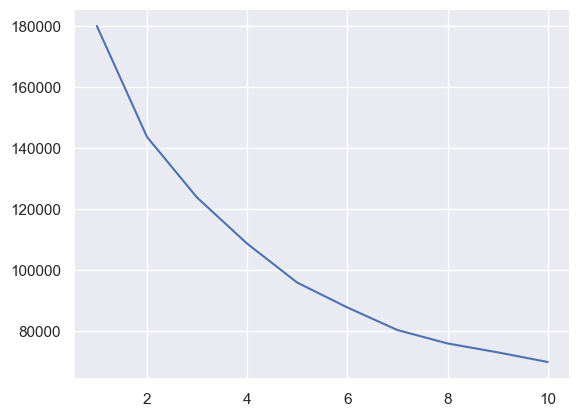

In [42]:
grafico = sns.lineplot(x=range(1,11), y=wcss)

In [43]:
kmeans_cartao_mais = KMeans(n_clusters=2, random_state=0)
rotulos = kmeans_cartao_mais.fit_predict(X_cartao_mais)

In [44]:
rotulos

array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

Quando trabalhamos com muitos atributos na hora de fazer o agrupamento, não é possível gerar o gráfico uma vez que o plano é entre o eixo X e Y. Nesse caso, uma técnica que pode ser usada é a do `PCA` para reduzir a dimensionalidade.

In [45]:
pca = PCA(n_components=2)
X_cartao_mais_pca = pca.fit_transform(X_cartao_mais)

In [46]:
X_cartao_mais_pca.shape

(30000, 2)

In [47]:
X_cartao_mais_pca

array([[-0.74082054, -1.13671858],
       [-1.48027121, -0.30100547],
       [-0.94737386, -0.48666789],
       ...,
       [-0.79468657, -0.90012663],
       [ 1.17562376, -1.54746987],
       [ 1.13614987, -1.14039836]])

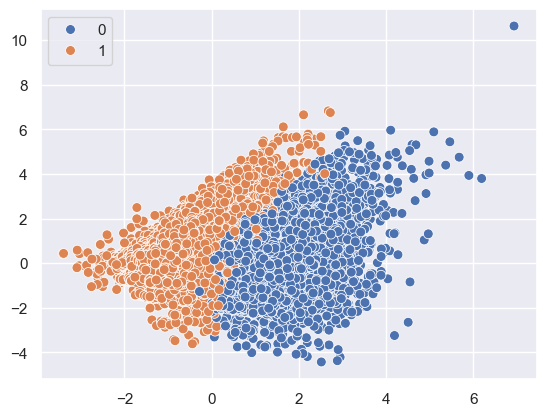

In [48]:
grafico1 = sns.scatterplot(x=X_cartao_mais_pca[:, 0], y=X_cartao_mais_pca[:, 1], hue=rotulos, palette="deep", s=50)

In [49]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[ 30000,  50000,      1, ...,      1, 230874,      0],
       [ 29999,  80000,      1, ...,      1, 266611,      0],
       [ 29996, 220000,      1, ...,      0, 725349,      0],
       ...,
       [    21, 130000,      2, ...,      0, 123883,      1],
       [    20, 180000,      2, ...,      0,      0,      1],
       [    17,  20000,      1, ...,      1, 106161,      1]])

# Agrupamento Hierárquico

## Base Salário e Idade

In [50]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

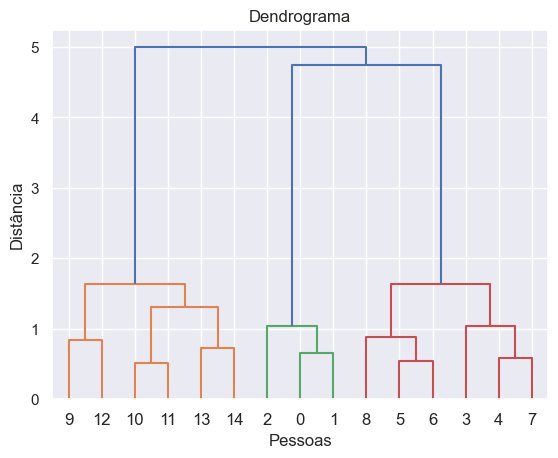

In [52]:
dendrograma = dendrogram(linkage(base_salario, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância');

Criando o Agrupamento Hierárquico

In [55]:
hc_salario = AgglomerativeClustering(n_clusters=3, linkage='ward')
rotulos = hc_salario.fit_predict(base_salario)

In [56]:
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

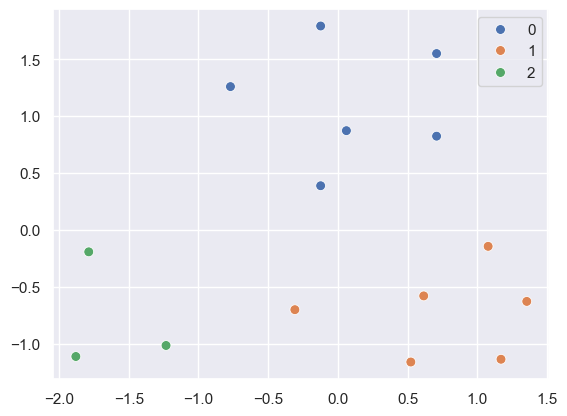

In [58]:
grafico = sns.scatterplot(x = base_salario[:,0], y = base_salario[:,1], hue=rotulos, palette='deep', s=50)


## Base Cartão de Crédito

In [59]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

Lembrando:
- [0] = Limite
- [1] = gasto total

In [ ]:
dendrograma = dendrogram(linkage(X_cartao, method = 'ward'))

In [63]:
hc_cartao = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
rotulos = hc_cartao.fit_predict(X_cartao)

In [64]:
rotulos

array([0, 0, 0, ..., 0, 0, 0])

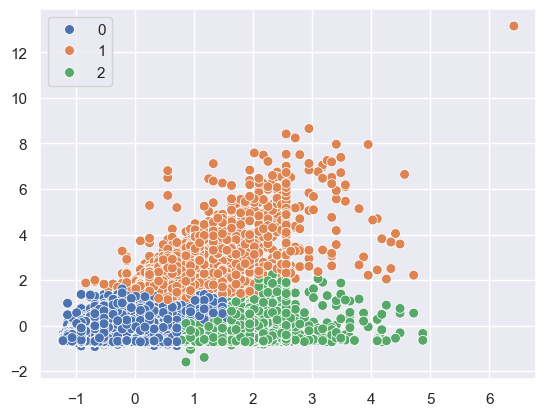

In [66]:
grafico = sns.scatterplot(x = X_cartao[:,0], y = X_cartao[:,1], hue=rotulos, palette='deep', s=50)


# DBSCAN

## Base Salário Idade

In [67]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

Criação e Treinamento

In [69]:
dbscan_salario = DBSCAN(eps = 0.95, min_samples=2) # eps - raio distancia maxima entre dois registros / min_samples - quantos pontos (registros) serão considerados
dbscan_salario.fit(base_salario)

DBSCAN(eps=0.95, min_samples=2)

In [70]:
rotulos = dbscan_salario.labels_
rotulos

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

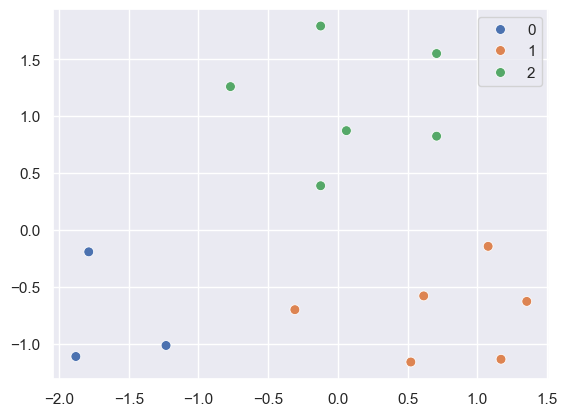

In [71]:
grafico = sns.scatterplot(x = base_salario[:,0], y = base_salario[:,1], hue = rotulos, palette='deep', s=50)


## Base Cartão de Crédito

In [72]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [79]:
dbscan_cartao = DBSCAN(eps=0.36, min_samples=5)
rotulos = dbscan_cartao.fit_predict(X_cartao)

In [77]:
rotulos

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
np.unique(rotulos, return_counts=True)

(array([-1,  0,  1,  2]), array([   56, 29917,    17,    10]))

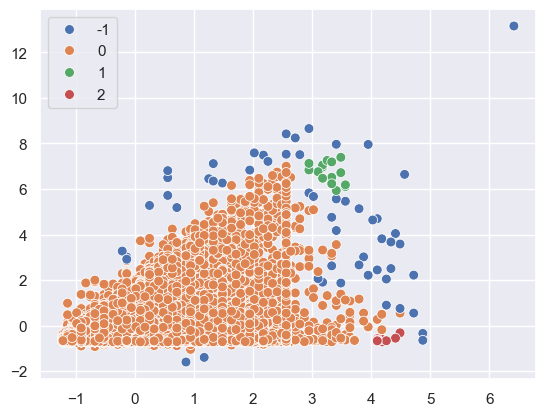

In [81]:
grafico = sns.scatterplot(x = X_cartao[:,0], y = X_cartao[:,1], hue = rotulos, palette='deep', s=50)


# K-Means x Hierárquivo x DBSCAN

### Importação

In [83]:
from sklearn import datasets

In [84]:
X_random, y_random = datasets.make_moons(n_samples=1500, noise = 0.09)

In [85]:
X_random

array([[ 0.22292777,  0.7788518 ],
       [ 2.14214003,  0.60058548],
       [-0.04613468,  0.44636306],
       ...,
       [ 2.00893351,  0.3182505 ],
       [ 1.68966101, -0.12939767],
       [ 0.78499464, -0.53400854]])

In [86]:
y_random

array([0, 1, 1, ..., 1, 1, 1])

In [87]:
np.unique(y_random)

array([0, 1])

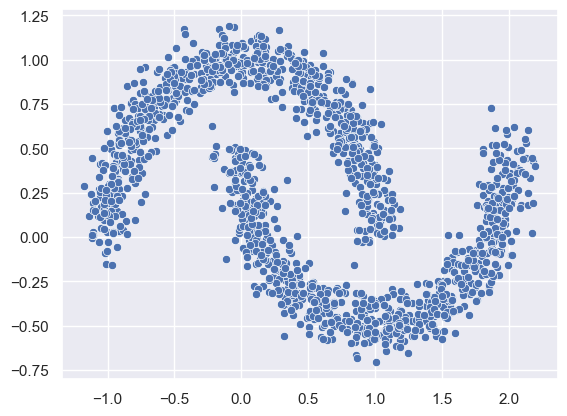

In [88]:
grafico = sns.scatterplot(x = X_random[:,0], y = X_random[:,1])


## Comparação

K-Means:

In [89]:
kmeans = KMeans(n_clusters=2)
rotulos = kmeans.fit_predict(X_random)

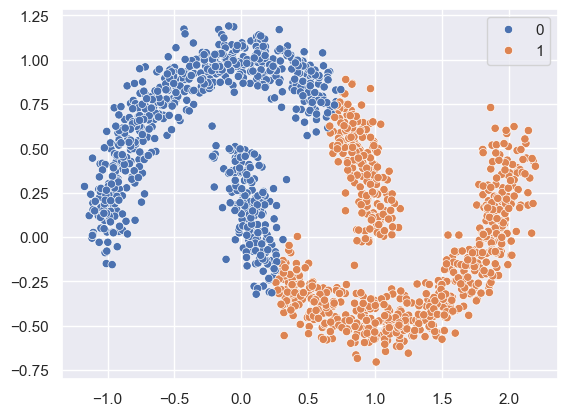

In [90]:
grafico = sns.scatterplot(x = X_random[:,0], y = X_random[:,1], hue=rotulos, palette='deep')


Hierárquico:

In [91]:
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
rotulos = hc.fit_predict(X_random)

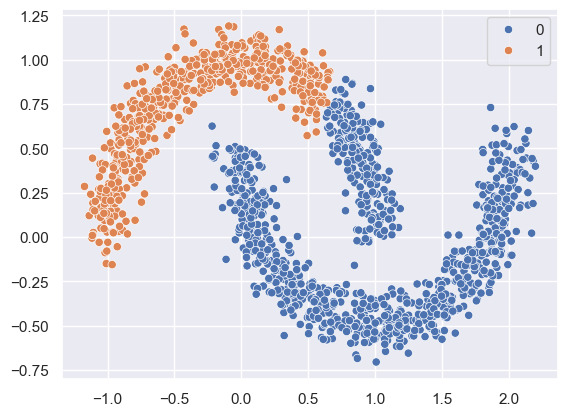

In [95]:
grafico = sns.scatterplot(x = X_random[:,0], y = X_random[:,1], hue=rotulos, palette='deep')


DBSCAN:

In [96]:
dbscan = DBSCAN(eps=0.1)
rotulos = dbscan.fit_predict(X_random)

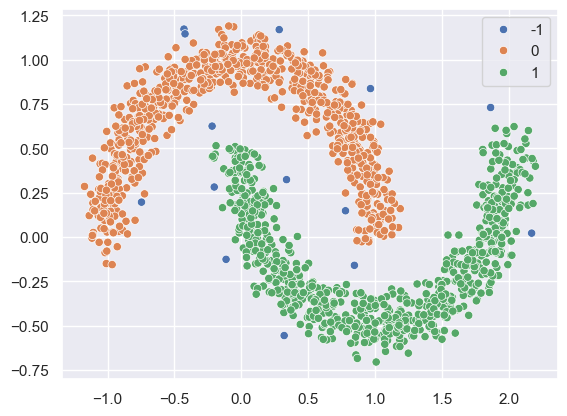

In [97]:
grafico = sns.scatterplot(x = X_random[:,0], y = X_random[:,1], hue=rotulos, palette='deep')
